## Data Merge

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("ratings.txt", delimiter = '\t')
data = data.drop(columns = 'id')
data.head()

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [2]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")
df16 = pd.read_csv("0127.csv", encoding="utf-8")
df17 = pd.read_csv("0128.csv", encoding="utf-8")
df18 = pd.read_csv("0129.csv", encoding="utf-8")
df19 = pd.read_csv("0130.csv", encoding="utf-8")
df20 = pd.read_csv("0131.csv", encoding="utf-8")
df21 = pd.read_csv("0201.csv", encoding="utf-8")
df22 = pd.read_csv("0202.csv", encoding="utf-8")

In [3]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22], axis=0, ignore_index = True)
data2 = data2.rename(columns = {'sentence':'document'})

def rating_to_label(score):
    if score >= 8:
        return '1'
    if score <= 5:
        return '0'
    
data2['label'] = data2['score'].apply(lambda x: rating_to_label(x))
data2 = data2.drop(columns = 'score')
data2 = data2.dropna(axis = 0)

In [4]:
data2.set_index('document',inplace=True)
data2 = data2.astype('int')
data2.reset_index(inplace=True)
data2.head()

,document,label
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",1
1,큐브가 훨씬 재미있었던 것 같다,0
2,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,1
3,넷플로시청하기에 10점~배우분들 매력 최고,1
4,이걸 영화라고....,0


In [5]:
df = pd.concat([data2, data], axis=0, ignore_index = True)
df.shape

(253341, 2)

## Data 전처리

In [6]:
df.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

C:\Users\user\AppData\Local\Temp\ipykernel_12848\1520741230.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\user\AppData\Local\Temp\ipykernel_12848\1520741230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


전처리 후 테스트용 샘플의 개수 : 245637


In [7]:
df["label"].value_counts()

1    136500
0    109137
Name: label, dtype: int64

In [8]:
df = pd.concat((df[df['label']==0],df[df['label']==1].head(len(df[df['label']==0]))), axis=0, ignore_index = True)
df.head()

,document,label
0,큐브가 훨씬 재미있었던 것 같다,0
1,이걸 영화라고,0
2,절대 보지 마세요완전 지루하고 노잼입니다평점이 도저히 이해가 안갑니다돈이 너무 아깝...,0
3,그렇게 하고싶냐,0
4,연필로 복지란 글자를 힘껏 쓰다 심이 부러짐,0


In [9]:
df["label"].value_counts()

0    109137
1    109137
Name: label, dtype: int64

<AxesSubplot:>

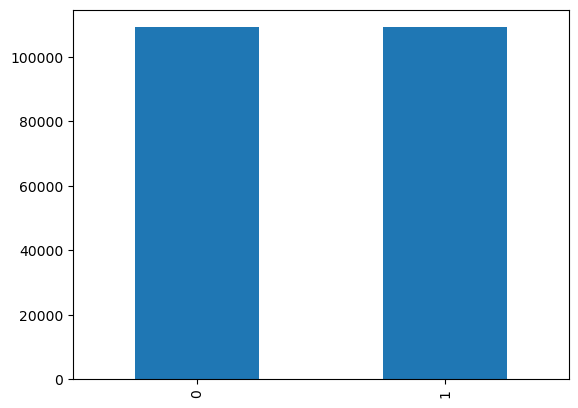

In [10]:
df['label'].value_counts().sort_index(ascending=True).plot(kind='bar')

## Data Preprocessing

In [62]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [63]:
train_df.sort_index().head(10)

,document,label
0,매우 한쪽으로 편향된 선동영화 마치 나치 프로파간다를 보는 기분,0
1,하정우 연기인생에 오점으로 남을 듯,0
2,상친자라면 무조건 봐야합니다 완전 선물같은 영화에요ㅠㅠㅠ,1
3,여태까지 봤던 만화중 가장 최악 신카이 마코토 감독이 유명하다고해서 한번 봤는데 이...,0
4,뭐 이딴영화가극초반에만무섭고 나머진 그냥 졸뻔할때 깜짝깜짝 놀라는수준 한국공포는 그...,0
5,연기는 잘 하는데 구구절절 한국식 신파는 철 지난 전반적으로 내용이 나쁘지는 않은데...,1
6,이건머 아동용,0
7,정말 좋은 영화이다 일본영화 특유의 잔잔함이 잘 표현되었다 추천하고 싶은 영화,1
8,토 쏠려 죽는줄 알았다 ㄷ ㄷ ㄷ,0
9,아이들영화 유치하기 짝이없네,0


In [64]:
from konlpy.tag import Okt

okt = Okt()

def pos_(input_text):
    result = [t for t, _ in okt.pos(input_text, norm = True, stem = True)]
    
    return result

for i in range(len(train_df)):
    train_df['document'][i] = pos_(train_df['document'][i])
    
for i in range(len(test_df)):
    test_df['document'][i] = pos_(test_df['document'][i])

C:\Users\user\AppData\Local\Temp\ipykernel_12848\1259318438.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['document'][i] = pos_(train_df['document'][i])
C:\Users\user\AppData\Local\Temp\ipykernel_12848\1259318438.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['document'][i] = pos_(test_df['document'][i])


[('이', 77059), ('영화', 63014), ('하다', 58031), ('보다', 57480), ('의', 39127), ('에', 35999), ('가', 35360), ('을', 31651), ('도', 28717), ('들', 25577)]


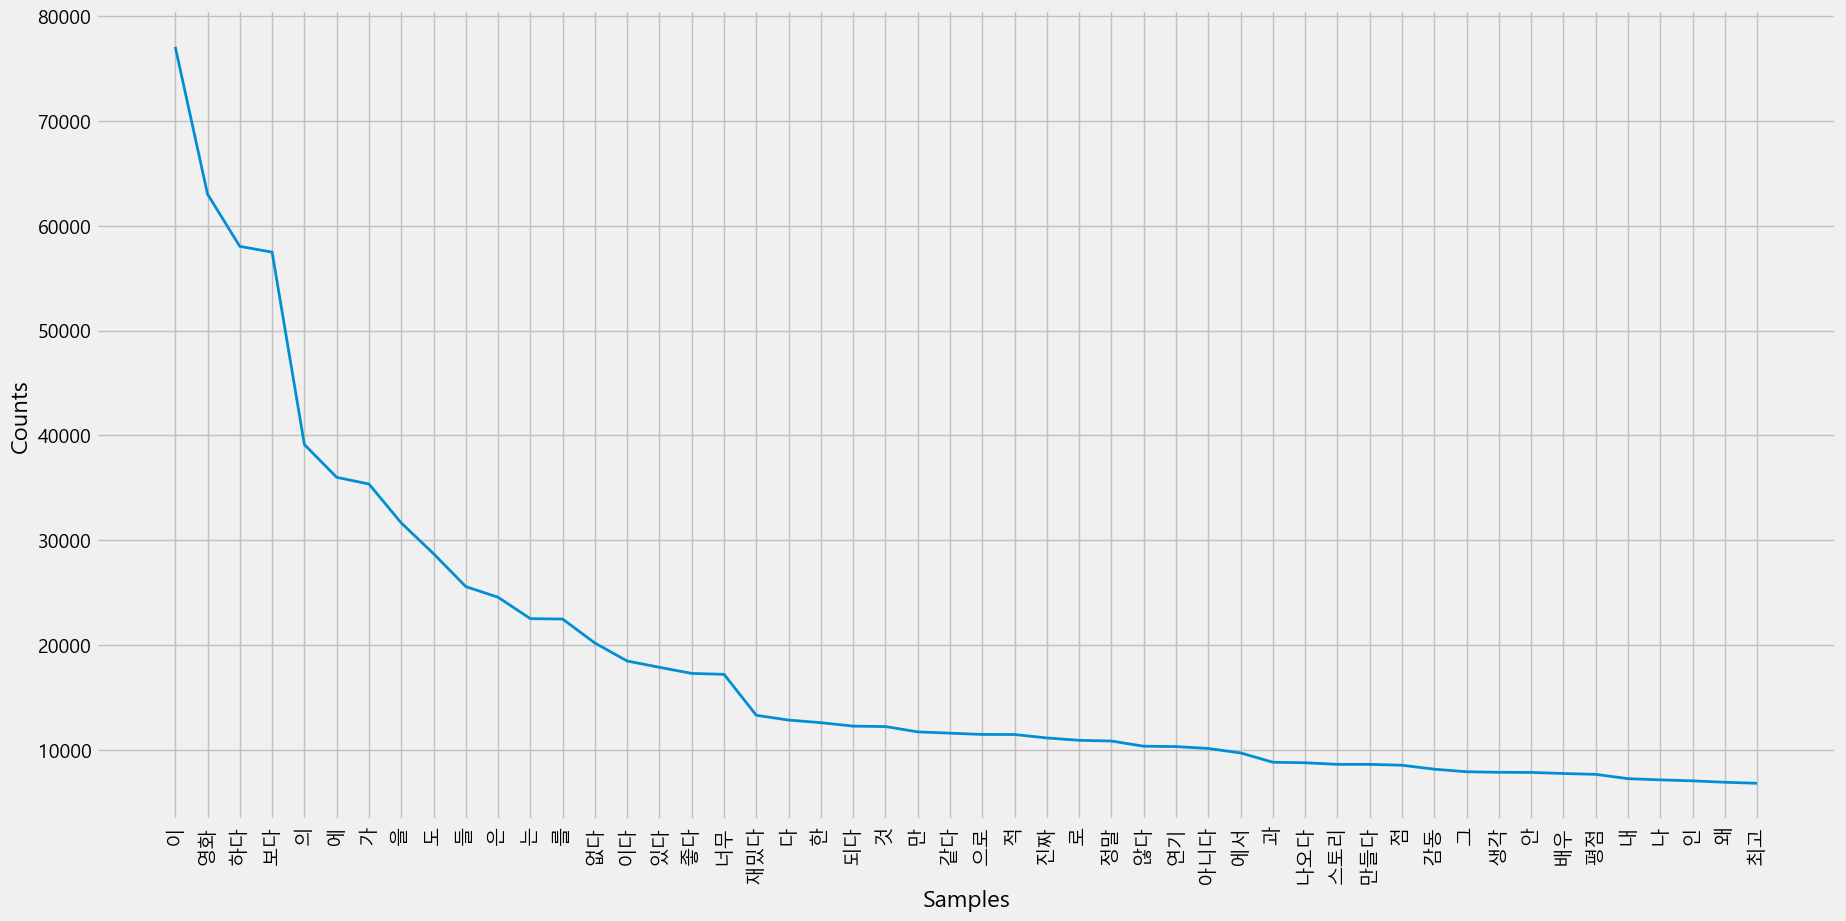

In [68]:
import nltk
import matplotlib.pyplot as plt

plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

train_docs = [(train_df.iloc[i][0], train_df.iloc[i][1]) for i in range(len(train_df))]
test_docs = [(test_df.iloc[i][0], test_df.iloc[i][1]) for i in range(len(test_df))]

tokens = [t for d in train_docs for t in d[0]]
text = nltk.Text(tokens, name = "Words")

print(text.vocab().most_common(10))

plt.figure(figsize = (20, 10))
text.plot(50)

plt.show()

In [77]:
selected_words = [f[0] for f in text.vocab().most_common(3000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

X_train = [term_frequency(words) for words, _ in train_docs]
X_test = [term_frequency(words) for words, _ in test_docs]
y_train = [label for _, label in train_docs]
y_test = [label for _, label in test_docs]

X_train = np.asarray(X_train).astype("float32")
X_test = np.asarray(X_test).astype("float32")
y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

##  Modeling

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2019)

In [81]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import layers

model = Sequential()

model.add(Dense(64, activation = "relu", input_shape = (3000, ))) # 입력되는 샘플의 벡터 형태
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
# 이진 분류이기 때문에 최종 층의 노드 수는 1이며 활성함수는 시그모이드 사용

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["acc"])
                                            
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 8, batch_size = 512)

Epoch 1/8
273/273 [==============================] - 12s 40ms/step - loss: 0.4101 - acc: 0.8187 - val_loss: 0.3578 - val_acc: 0.8430
Epoch 2/8
273/273 [==============================] - 2s 9ms/step - loss: 0.3321 - acc: 0.8534 - val_loss: 0.3470 - val_acc: 0.8456
Epoch 3/8
273/273 [==============================] - 2s 9ms/step - loss: 0.3023 - acc: 0.8679 - val_loss: 0.3461 - val_acc: 0.8477
Epoch 4/8
273/273 [==============================] - 2s 9ms/step - loss: 0.2708 - acc: 0.8853 - val_loss: 0.3575 - val_acc: 0.8451
Epoch 5/8
273/273 [==============================] - 2s 9ms/step - loss: 0.2396 - acc: 0.9008 - val_loss: 0.3711 - val_acc: 0.8449
Epoch 6/8
273/273 [==============================] - 2s 9ms/step - loss: 0.2085 - acc: 0.9150 - val_loss: 0.3968 - val_acc: 0.8420
Epoch 7/8
273/273 [==============================] - 2s 9ms/step - loss: 0.1794 - acc: 0.9288 - val_loss: 0.4340 - val_acc: 0.8396
Epoch 8/8
273/273 [==============================] - 2s 9ms/step - loss: 0.1519 -

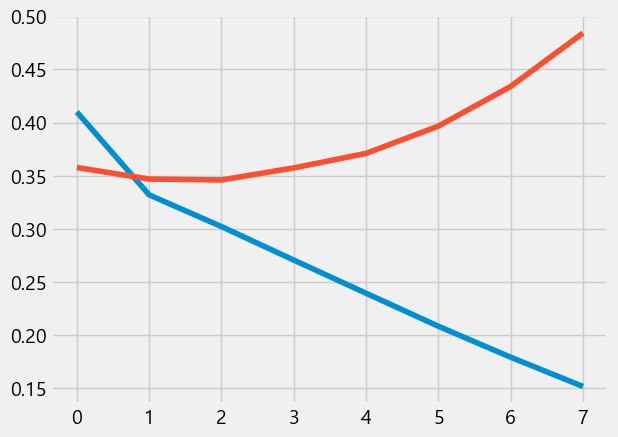

In [82]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [84]:
results = model.evaluate(X_test, y_test)
results

1365/1365 [==============================] - 2s 2ms/step - loss: 0.4895 - acc: 0.8378


[0.4894742965698242, 0.8378421664237976]

## Evaluation

In [105]:
def tokenize(doc):
    #형태소와 품사를 join
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [114]:
def predict_pos_neg():
    review = input('리뷰를 작성해주세요:')
    str = [review]
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype("float32"), axis = 0)
    score = float(model.predict(data))
    
    if(score > 0.5):
        print(f"{round((score)*100)}%의 확률로 긍정적인 리뷰입니다")
    else:
        print(f"{round((1-score)*100)}%의 확률로 부정적인 리뷰입니다")

In [117]:
predict_pos_neg()

리뷰를 작성해주세요: 너무 지루해요ㅠㅠ


1/1 [==============================] - 0s 84ms/step
56%의 확률로 부정적인 리뷰입니다
